# RESOLVE DSP Tutorial #2: Galaxies and their Different Flavors
_______________________________________________________
By Derrick Carr


Welcome! This document is a short tutorial that will teach us what galaxies look like and some basic categories of galaxies.

\\
Instructions:


1. **To complete this tutorial, Press SHIFT+ENTER (or whatever that may be on a MAC if you're using one) to run each "cell" of code *
2. Please run the cells in order, as the codes may otherwise fail or produce incorrect results.
3. There are a few questions in these tutorials. The answers can be found at the end. Try to not use them until you either have an answer or you are stuck!
**Estimated Time to Complete this Tutorial:** 20-30 min


 
\\



This document is written using the coding language Python. If you have already completed the "What is a Galaxy?" tutorial, then you may already have some experience with it. While you will not need to know or extensively write Python yourself, I will try explain in words on the side what parts of code do. Knowing how to code is a pretty useful skill in today's society. If this is your first time seeing code, then I would recommend trying your best to follow along. 



---

# (1) Disk and Spheroidal Galaxies




Let's start with some basics that you may already know. We live in a galaxy called the **Milky Way.** The Milky Way is a good example of a disk galaxy, which commonly have spiral arms. Here's an image of another disk galaxy known as UGC 2885.




<img src='https://users.castle.unc.edu/~derrcarr/spiralgalaxy.jpg'/>

On the opposite side of the structure spectrum, we have spheroidal (sphere-like) galaxies. An example of a spheroidal galaxy would be ESO 325-G004 (below). Sometimes astronomers use the structure and shape of a galaxy to classify them. Astonomers also often use colors to split them into two groups: blue galaxies and red galaxies. UGC 2885 (above) is an example of a blue galaxy and ESO 325-G004 (below) would be an example of a red galaxy. 

<img src='https://users.castle.unc.edu/~derrcarr/ellipticalgalaxy.jpg'>

Galaxies typically appear blue or red due to the color of their stars. Galaxies with a lot of young blue stars will appear blue while galaxies that are dominated with old red stars will appear red. 

<br>

## The RESOLVE Survey and Getting the Data
__________________________________________


Let's explore the different types of galaxies in the RESOLVE survey (https://resolve.astro.unc.edu/). This is the same survey that was used in the first tutorial and is a survey of ~2000 galaxies.

To start, let's load in some programs that will help us explore the data using plots and figures. For those who are new to coding, the code blocks (parts with darker background and more colorful font) will have python code in them and there will be green comments after a hashtag symbol to explain what is happening. To run each section of code, all you have to do is click on the code block with your mouse and press **Shift + Enter**. Let's start with the first code block below that begins with 2 hashtag lines and then `import matplotlib`.


**Be sure to run the code blocks in order of how they appear (as in, don't skip to the end and run just a block of code there) or else it may not work!**

In [ ]:
#Anything that starts with "import" means I am loading in a module that can perform a bunch of tasks for me. 
#Anything that start with "from" means that I am loading in a particular task from a specific module
import matplotlib
import matplotlib.pyplot as plt #imports a particular function from the package and renames it to something shorter/easier to type
import scipy.stats 
import pandas as pd
import numpy as np
import scipy
from matplotlib import cm 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import matplotlib.image as mpimg
from urllib.request import urlopen
print('Modules successfully downloaded') #If this ran properly, you should see below some text that says the modules were successfully downloaded


Modules successfully downloaded


So now we have imported a bunch of packages with a ton of useful functions to do specific tasks. Python also allows you to write your own functions so you can use them exactly how you would like. Run the code block below to define a few custom plot-making functions that will be useful for this specific tutorial. These functions are very complex (because making plots can get complicated) so do not worry about understanding how they work. 

In [ ]:
def offset_image(name, zoom=0.35):
    with urlopen("https://users.castle.unc.edu/~derrcarr/images2/"+name+"_dr8_images.png") as file:
        arg_img = plt.imread(file ,format='jpg')
    return OffsetImage(arg_img, zoom=zoom)   

def plot_galaxy(names,x,y,show_images=True):
    fig, ax = plt.subplots(1, 1, figsize=(16, 14))
    ax.tick_params(axis='both', which='major', labelsize=19)
    ax.imshow(np.rot90(Z), cmap='bone_r',                                                    
          extent=[xmin, xmax, ymin, ymax], interpolation='gaussian')
    ax.contour(X, Y, Z, cmap='summer')  
    if show_images:
        artists = []
        for i,name in enumerate(names):
            try:
              ab = AnnotationBbox(offset_image(name), (x[i],y[i]), frameon=False)
            except FileNotFoundError:
              continue
            artists.append(ax.add_artist(ab))
    ax.set_xlim(8.6,11.1)
    ax.set_ylim(0.5,3)
    ax.set_xlabel(r'log Mass of all the stars and gas [Units = Solar masses]', fontsize=19)
    ax.set_ylabel('Color', fontsize=19)

def plot_morph(frame):
    frame1 = frame[frame['morph'] == 'E']
    frame2 = frame[frame['morph'] == 'L']
    fig, ax = plt.subplots(1, 1, figsize=(16, 14))
    ax.tick_params(axis='both', which='major', labelsize=19)
    ax.contour(X, Y, Z, cmap='summer')  
    for gal in frame1.index:
      ax.text(frame1.at[gal,'log_stars_and_gas'], frame1.at[gal, 'color'], 'S', fontsize=22)
    
    for gal in frame2.index:
      ax.text(frame2.at[gal,'log_stars_and_gas'], frame2.at[gal, 'color'], 'D', fontsize=22)
    ax.set_xlim(8.6,11.1)
    ax.set_ylim(0.5,3)
    ax.set_xlabel(r'Mass of all the stars and gas [Units = Solar masses]', fontsize=19)
    ax.set_ylabel('Color', fontsize=19)

def density_estimation(m1, m2):
    xmin, xmax, ymin, ymax = 8.5, 12, 0.5, 3.0
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])  
    values = np.vstack([m1, m2])  
    kernel = scipy.stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

print('functions loaded')

functions loaded


Now that the functions are loaded in, let's finally start to play with the data. First we will start with loading in a file into a format that is called a **dataframe** -- a table that keeps all of the galaxies and their parameters in an easy-to-use structure. Run the code block below and follow along with the green comments to get a sense of what each line of code is doing



In [ ]:
resolve = pd.read_csv('https://users.castle.unc.edu/~derrcarr/RESOLVE_tutorial.csv')  # loads all of our data into a dataframe (The file itself is on a personal online server of mine)

resolve['star_and_gas_mass'] = 10**resolve['logmstar'] + 10**resolve['logmgas']       # calculates the total mass of the stars and the gas for each galaxy.
resolve['log_stars_and_gas'] = np.log10(resolve['star_and_gas_mass'])                 # puts the mass into log values for simpler plots.
resolve['color'] = resolve['blue'] - resolve['red']                                   # creates a parameter that corresponds to the "color" of a galaxy.
resolve = resolve[(resolve['color'] > 0) & (resolve['color'] < 3)]                    # excluding any galaxies with unreliable colors (either too high or too low).
resolve = resolve[(resolve['red'] < -17.0) | (resolve['log_stars_and_gas'] > 9)]      # choosing galaxies that are not too dim and tiny.
resolve = resolve.reset_index()                                                       # updates the dataframe to let it know I changed the rows around.

To verify that we have loaded in the data, copy `resolve['name']` into the empty cell below and run it.

If this worked, you should see a column of numbers on the left (that corresponds to the number of rows where each row is its own galaxy) and galaxies with names that either start with "rf" or "rs" on the right. We just asked the computer to tell us the name of all the galaxies in the dataframe called `resolve`, along with what row number they are in the dataframe. Notice that Python likes to start with 0 when counting instead of 1 (you get used to it eventually). 


***Question 1) Given that Python starts counting from 0 and the last row is 1637, how many galaxies (rows) are actually in the dataframe?***

***Question 2) Let's say instead of seeing the `name` of the galaxy, you wanted the `color`. How would you change the code line above? Feel free to test it out.***

***Answers can be found at the bottom of the tutorial***

# (2) Galaxy Colors and the Color Sequence
_________________________________________


Now let's create our first plot! Press Shift + Enter on the cell below to create the plot. This cell can possibly take up to a minute or longer to run.


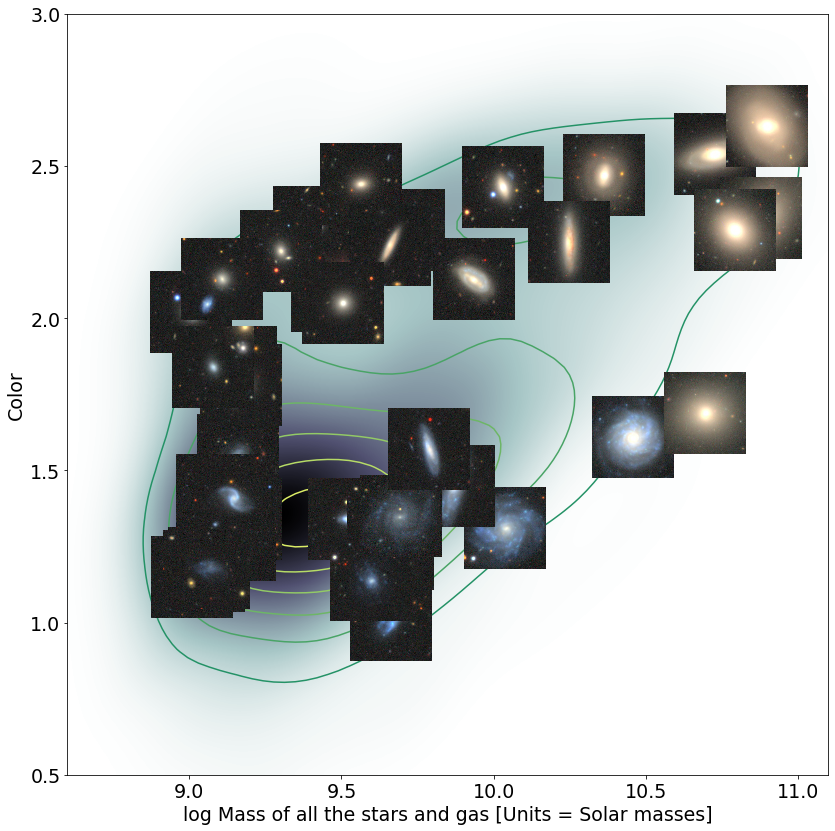

In [ ]:
xmin, xmax, ymin, ymax = 8.5, 11.5, 0.5, 3.0                                                                                   #gives the limits of the plot
X,Y,Z = density_estimation(resolve['log_stars_and_gas'], resolve['color'])                                                     #function that helps make the contour lines
plot_galaxy(resolve['name'][50:90],resolve['log_stars_and_gas'][50:90].values,resolve['color'][50:90].values,show_images=True) #function that makes the plot 

If everything has worked properly, we should see a plot above. The plot should have some actual images of a select few galaxies from our `resolve` dataframe and green-ish lines with lighter/darker shades. On the x-axis we have the total mass of the stars and the gas in a galaxy, and on the y-axis we have a number assigned for each galaxy that represents color. Finally, in the back we have contours where the lighter green lines/darker gray shade mean that more galaxies are typically found around that mass and color. 

Notice that the X-axis only goes from 8.5 to 11. That is because it is in log scale, meaning in order to get the true number for the total stars and gas in units of solar masses, you would raise 10 to that power of that number. So if a galaxy was at an x-value of 9, that really means it has 1,000,000,000 ($10^9$) solar masses! On top of that, a solar mass is the mass of our sun, which contains 2 x $10^{30}$ kilograms, so the total mass of galaxies in kilograms can be in excess of $10^{40}$ kilograms! 

***Question 3) Let's say there is a globular cluster (which is a spherical cluster of up to millions of stars, google "M13 cluster" for a visual example of one) that has log stellar mass of 6 in solar masses. How many kilograms would that be? You must convert this number from log to linear units and then from solar masses to kilograms. Recall that 1 solar mass = 2 x $10^{30}$ kilograms***


Now for the color axis, the colors range from blue to red. 

***Question 4) Based on the plot we just made and the galaxy images you can see, does a higher number on the y-axis represent redder galaxies or bluer galaxies?*** 

 This trend of galaxy colors is known as the "Color Sequence". The large section full of blue galaxies is called the blue cloud and the other elongated section of red galaxies is known as the red sequence. In between those two regions is known as the green valley, and is composed of galaxies that are too blue to be in the red sequence and too red to be in the blue cloud. Not many galaxies can be found in the green valley. The image below may help to give you a better understanding of it. 



<img src='https://users.castle.unc.edu/~derrcarr/colorsequence.jpg'>

# (3) Galaxy Shapes
___________________________________________________

On top of galaxies typically being either blue or red, color also correlates with the shape and structure of a galaxy. Below, we will take a modified version of the code we used to make our first plot to determine whether a galaxy is a disk galaxy or an spheroidal galaxy. 

In [ ]:
plot_morph(resolve[50:90]) #using the function that makes the slightly modified plot

Here, we're using the same galaxies as the first plot we made, but instead of pictures, we are using letters to represent the galaxy's structure. The letter S represents a spheroid galaxy, and the D represents a disk galaxy. 

***Question 5) What structural type of galaxies is most common in the blue cloud? What is the most common type of galaxy in the red sequence?***


Hopefully, you found that galaxies in the blue cloud are typically disks, while galaxies in the red sequence are most often spheroids. 

There are many reasons as to why a galaxy can either be disky or spheroidal. Disky structure often indicates that there was originally gas disk around the galaxy, but then some (or all) of the gas in that disk was used as fuel to make stars. Those created stars then stay in the same disky shape. Spheroidal galaxies can often arise from stars born in gas that is not is an ordered disky structure. Alternatively, if a larger galaxy merges with a smaller galaxy, the stars from the smaller galaxy may be randomly placed around the larger galaxy, giving it a more spherical appearance. 

Not every galaxy has to follow that rule blue=disky and red=spheroidal rule, as there are red disks and blue spheroids (see images below for a red disk galaxy and a blue spheroid galaxy, both within our own survey). The small sample of galaxies we used in this tutorial seems to have a few red disks in there, can you find at least one in the first plot we made? (hint, the red disk below is also in the first plot)

<img src='https://users.castle.unc.edu/~derrcarr/reddiskgalaxy.png'/>
<img src='https://users.castle.unc.edu/~derrcarr/blueellipticalgalaxy.png'/>

# (4) Conclusions
_____________________________________________________

Hopefully you found this short tutorial exciting! If you've interested, please feel free to read up some more on related topics about galaxies. Here's an interesting link that talks a bit about some of the topics in this tutorial.

https://hubblesite.org/science/galaxies#:~:text=Astronomers%20classify%20galaxies%20into%20three,more%20than%20a%20trillion%20stars.

and finally, if you want to **actually look at galaxies yourself and help the astronomy community**, check out Galaxy Zoo! It's a volunteer project where people like me and you can help identify features on galaxies (such as spiral arms) to help classify them for astronomers! 

https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/



# (5) Answers
____________________________________________________________________
1) The answer is 1638, since we count starting from 0 and it goes up to 1637.

2) `resolve['color']`. Fun fact, if you want to see all of the parameters that are available in a dataframe called `resolve`, then you can type `resolve.columns`. I've left an empty coding cell below for you to test this out. Feel free to try and look at other parameters in the dataframe.

3) Going from log stellar mass of 6 to linear units would be $10^6$, or one million solar masses. From there, since we know there are 2 * $10^{30}$ kilograms in a solar mass, the stellar mass would be $10^6$ * (2 * $10^{30}$) = 2 * $10^{36}$ kilograms. 

4) The correct answer is redder galaxies. Red galaxies have a higher number while blue galaxies have a lower color number.

5) **the answer to this question is essentially given in the text above**, but disk galaxies are mostly found in the blue cloud while spheroidal galaxies are found in the red sequence. Recall that disk galaxies includes mainly spiral galaxies and spheroidal galaxies are often called elliptical galaxies. There are also some galaxies that have disks but also have a spheroid in its center as well. This makes classification tricky and I believe it's best to think of galaxies as being on a spectrum that ranges from completely disky to completely spheroidal. 